
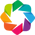

In [1]:
import pandas as pd
import numpy as np
import holoviews as hv
hv.extension('bokeh')

In [20]:
# cwd should be the examples
station_info = pd.read_csv("assets/station_info.csv")
station_info.head()

# Scatter is an object, independent of any plotting library.
scatter = hv.Scatter(station_info, 'services', 'ridership')
scatter
# print(scatter)

/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:Scatter   [services]   (ridership)

## Compositional Layouts

In [30]:
layout = scatter + hv.Histogram(np.histogram(station_info['opened'], bins=24), kdims=['opened'])
layout
# Layout isn't a plot, it's an object that is independent.
# create new layouts with the + sign.
# print(layout)

taxi_dropoffs = {hour:arr for hour, arr in np.load('assets/hourly_taxi_data.npz').items()}
#print('Hours: {hours}'.format(hours=', '.join(taxi_dropoffs.keys())))
print('Taxi data contains {num} arrays (one per hour).\nDescription of the first array:\n'.format(num=len(taxi_dropoffs)))
np.info(taxi_dropoffs['0'])

hotspot.data


Taxi data contains 24 arrays (one per hour).
Description of the first array:

class:  ndarray
shape:  (256, 256)
strides:  (1024, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x11032d000
byteorder:  little
byteswap:  False
type: float32


NameError: name 'hotspot' is not defined

# Conditional Distributions

In [57]:
hw = pd.read_csv("../hw_200.csv")
# hw = pd.read_csv("../hw_25000.csv")
hw = hw.rename(columns={hw.columns[0]: "ind",
             hw.columns[1]:'height',
             hw.columns[2]:'weight'})
scatter = hv.Scatter(hw, "height", "weight")
# Show the marginals, but does not update on movement
scatter.hist(num_bins=10, dimension=["height", "weight"])

:AdjointLayout
   :Scatter   [height]   (weight)
   :Histogram   [weight]   (weight_frequency)
   :Histogram   [height]   (height_frequency)

# Selection Stream Example


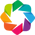

In [4]:
import pandas as pd
import numpy as np
import holoviews as hv
from holoviews.streams import Selection1D
hv.extension('bokeh')
renderer = hv.renderer('bokeh')




In [50]:
%%opts Points [tools=['box_select']]

# Declare some points
points = hv.Points(np.random.randn(1000,2 ))

# Declare points as source of selection stream
selection = Selection1D(source=points)

# Write function that uses the selection indices to slice points and compute stats
def selected_info(index):
    print(index)
    selected = points.iloc[index]
    print(selected)
    if index:
        label = 'Mean x, y: %.3f, %.3f' % tuple(selected.array().mean(axis=0))
    else:
        label = 'No selection'
    return selected.relabel(label).opts(style=dict(color='red'))

mean_sel = hv.DynamicMap(lambda index: hv.HLine(points.iloc[index]['y'].mean()
                                                if index else -10),
                         kdims=[], streams=[sel])

# Combine points and DynamicMap
points + hv.DynamicMap(selected_info, streams=[selection])


[]
:Points   [x,y]


:Layout
   .Points.I     :Points   [x,y]
   .DynamicMap.I :DynamicMap   []

In [3]:
renderer = hv.renderer('bokeh')
hv.opts("Points [tools=['box_select']]")

data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))
points = hv.Points(data)
sel = Selection1D(source=points)

def xdis(index):
    selected = points.iloc[index]
    dist = hv.Distribution(selected)
    return dist

def ydis(index):
    selected = points.iloc[index]
    dist = hv.Distribution(selected, kdims=['y'])
    return dist

# Create the Dynamic Maps for X and Y
xconditional = hv.DynamicMap(xdis, streams=[sel])
yconditional = hv.DynamicMap(ydis, streams=[sel])


# (points.hist(num_bins=10, dimension=["x", "y"]) + xconditional).cols(1) + yconditional
# (points + yconditional + xconditional).cols(2)
points << yconditional << xconditional


NameError: name 'Selection1D' is not defined

In [85]:
data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))
points = hv.Points(data)
hv.Distribution(points, kdims=['y'])

:Distribution   [y]   (Density)

# Live Data Tutorial

In [43]:
xvals = np.linspace(-4,0,202)
yvals = np.linspace(4,0,202)
xs,ys = np.meshgrid(xvals, yvals)

def waves_image(alpha, beta):
    return hv.Image(np.sin(((ys/alpha)**alpha+beta)*xs))

waves_image(0,0) + waves_image(0,4)

# Key dimensions specify arguments into function waves_image
dmap = hv.DynamicMap(waves_image, kdims=['alpha', 'beta'])
# dmap

# dmap[0,1] + dmap.select(alpha=1, beta=2)
# dmap.redim.values(alpha=[0,1,2], beta=[0.1, 1.0, 2.5])



/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


:DynamicMap   [alpha,beta]

In [44]:
def shapes(N, radius=0.5): # Positional keyword arguments are fine
    paths = [hv.Path([[(radius*np.sin(a), radius*np.cos(a)) 
                        for a in np.linspace(-np.pi, np.pi, n+2)]], 
                     extents=(-1,-1,1,1)) 
             for n in range(N,N+3)]
    return hv.Overlay(paths)

In [46]:
%%opts Path (line_width=1.5)
holomap = hv.HoloMap({(N,r):shapes(N, r) for N in [3,4,5] for r in [0.5,0.75]},  kdims=['N', 'radius'])
dmap = hv.DynamicMap(shapes, kdims=['N','radius'])
holomap + dmap

/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/bokeh/core/json_encoder.py:80: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(type(obj), np.float):


:Layout
   .HoloMap.I    :HoloMap   [N,radius]
      :Overlay
         .Path.I   :Path   [x,y]
         .Path.II  :Path   [x,y]
         .Path.III :Path   [x,y]
   .DynamicMap.I :DynamicMap   [N,radius]

# Working on heatmaps and quadmesh

In [35]:
# Quadmesh
data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))
n = 8  # Number of bins in each direction
xs = np.logspace(1, 3, n)
ys = np.linspace(1, 10, n)
zs = np.arange((n-1)**2).reshape(n-1, n-1)
np.arange((7**2))

ht, xt, yt = np.histogram2d(data[:,0], data[:,1], 10)
hv.QuadMesh((xt, yt, ht))
?hv.QuadMesh



### Making interactivity of heatmap

In [75]:
from bokeh.models import Select
data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))

def hmap(n):
    ht, xt, yt = np.histogram2d(data[:,0], data[:,1], n)
    return(hv.QuadMesh((xt, yt, ht)))

def test_function(raw):
    print(raw)
    
def mainPlot(plot_type):
    if (plot_type == "scatter"):
        return hv.Points(data)
    ht, xt, yt = np.histogram2d(data[:,0], data[:,1], n)
    return hv.QuadMesh((xt,yt,ht))

# heatmap = hv.DynamicMap(hmap, kdims=['n'])
# heatmap.redim.range(n=(5,40))

# plot_type = Select(title='Plot Type', value='Scatter', options=['None'] + ["scatter", "heatmap"])
# plot_type.on_change('value', test_function)
plot_types = ['scatter', 'heatmap']
dmap = hv.DynamicMap(mainPlot, kdims='plot_type').redim.values(plot_type=plot_types)
dmap



Invoked as dynamic_operation('heatmap')


Traceback (most recent call last):
  File "/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/holoviews/plotting/util.py", line 196, in get_plot_frame
    return map_obj[key]
  File "/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/holoviews/core/spaces.py", line 1026, in __getitem__
    val = self._execute_callback(*tuple_key)
  File "/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/holoviews/core/spaces.py", line 855, in _execute_callback
    retval = self.callback(*args, **kwargs)
  File "/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/holoviews/core/spaces.py", line 522, in __call__
    ret = self.callable(*args, **kwargs)
  File "/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/holoviews/util/__init__.py", line 349, in dynamic_operation
    return self._process(map_obj[key], key)
  File "/Users/mliou/.virtualenvs/iviz/lib/python3.6/site-packages/holoviews/core/spaces.py", line 1029, in __getitem__
    self._cache(tuple_key, val)
  F

:DynamicMap   [plot_type]

In [6]:
%%opts Points [tools=['box_select']]
data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))
points = hv.Points(data)

sel = Selection1D(source=points)

def xdis(index):
    selected = points.iloc[index]
    dist = hv.Distribution(selected)
    return dist

def ydis(index):
    selected = points.iloc[index]
    dist = hv.Distribution(selected, kdims=['y'])
    return dist

def hmap(n):
    ht, xt, yt = np.histogram2d(data[:,0], data[:,1], n)
    return(hv.QuadMesh((xt, yt, ht)))

heatmap = hv.DynamicMap(hmap, kdims=['n']).redim.range(n=(5,40))
xconditional = hv.DynamicMap(xdis, streams=[sel])
yconditional = hv.DynamicMap(ydis, streams=[sel])
points * heatmap << xconditional << yconditional

:AdjointLayout
   :DynamicMap   [n]
   :DynamicMap   []
   :DynamicMap   []

In [5]:
%%opts Points [tools=['box_select']]
from holoviews.streams import Selection1D
data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))
points = hv.Points(data)

sel = Selection1D(source=points)

def xdis(index):
    selected = points.iloc[index]
    dist = hv.Distribution(selected)
    return dist

def ydis(index):
    selected = points.iloc[index]
    dist = hv.Distribution(selected, kdims=['y'])
    return dist


# Create the Dynamic Maps for X and Y
xconditional = hv.DynamicMap(xdis, streams=[sel])
yconditional = hv.DynamicMap(ydis, streams=[sel])
hv.DynamicMap(hmap, kdims=['n'])

ht, xt, yt = np.histogram2d(data[:,0], data[:,1], 10)
heat = hv.QuadMesh((xt, yt, ht))

points*heat << yconditional << xconditional

NameError: name 'hmap' is not defined

# Hexbinning

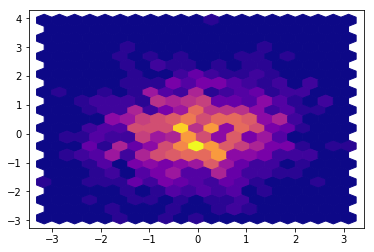

In [94]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.multivariate_normal((0, 0), [[1, 0.1], [0.1, 1]], (1000,))
plt.hexbin(data[:,0], data[:,1], gridsize=20, cmap='plasma')

TypeError: DynamicMap does not accept PolyCollection type, data elements have to be a ('ViewableElement', 'NdMapping', 'Layout').

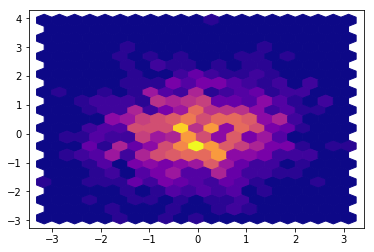

In [104]:
def hexxing(gridsize):
    return(plt.hexbin(data[:,0], data[:,1], gridsize=gridsize, cmap='plasma'))
hex = hv.DynamicMap(hexxing, kdims=["gridsize"])
hex.select(gridsize=20)

In [97]:
import holoviews.plotting.mpl
list(hv.Store.registry['matplotlib'].items())

[(holoviews.element.chart.Curve, holoviews.plotting.mpl.chart.CurvePlot),
 (holoviews.element.chart.Scatter, holoviews.plotting.mpl.chart.PointPlot),
 (holoviews.element.chart.Bars, holoviews.plotting.mpl.chart.BarPlot),
 (holoviews.element.chart.Histogram,
  holoviews.plotting.mpl.chart.HistogramPlot),
 (holoviews.element.chart.Points, holoviews.plotting.mpl.chart.PointPlot),
 (holoviews.element.chart.VectorField,
  holoviews.plotting.mpl.chart.VectorFieldPlot),
 (holoviews.element.chart.ErrorBars, holoviews.plotting.mpl.chart.ErrorPlot),
 (holoviews.element.chart.Spread, holoviews.plotting.mpl.chart.SpreadPlot),
 (holoviews.element.chart.Spikes, holoviews.plotting.mpl.chart.SpikesPlot),
 (holoviews.element.chart.BoxWhisker, holoviews.plotting.mpl.chart.BoxPlot),
 (holoviews.element.chart.Area, holoviews.plotting.mpl.chart.AreaPlot),
 (holoviews.core.spaces.GridSpace,
  <holoviews.plotting.plot.PlotSelector at 0x11b24ea20>),
 (holoviews.core.spaces.GridMatrix,
  <holoviews.plotting.pl

In [102]:
import bokeh
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

counties = [dict(county, Unemployment=unemployment[cid])
            for cid, county in counties.items()
            if county["state"] == "tx"]

choropleth = hv.Polygons(counties, ['lons', 'lats'], [('detailed name', 'County'), 'Unemployment'])

counties

[{'Unemployment': 9.4,
  'detailed name': 'Anderson County, Texas',
  'lats': [31.91362,
   31.89528,
   31.87634,
   31.85071,
   31.83575,
   31.81688,
   31.79429,
   31.77313,
   31.7582,
   31.74526,
   31.72938,
   31.73164,
   31.71553,
   31.70175,
   31.67641,
   31.65465,
   31.63306,
   31.61811,
   31.59289,
   31.59288,
   31.58872,
   31.58561,
   31.58458,
   31.58227,
   31.5794,
   31.57698,
   31.57436,
   31.57029,
   31.56988,
   31.56839,
   31.56379,
   31.5607,
   31.55792,
   31.55528,
   31.55202,
   31.54868,
   31.5459,
   31.54469,
   31.54179,
   31.52772,
   31.52454,
   31.51888,
   31.51312,
   31.51138,
   31.50414,
   31.50406,
   31.50412,
   31.51511,
   31.52386,
   31.5314,
   31.54276,
   31.55299,
   31.5511,
   31.55397,
   31.562,
   31.57085,
   31.58169,
   31.58593,
   31.59361,
   31.60455,
   31.61953,
   31.63005,
   31.6408,
   31.65409,
   31.64959,
   31.64068,
   31.62474,
   31.61304,
   31.60417,
   31.59758,
   31.60849,
   31.6182